# CST_ALL_PTMs_Normalization
This notebook will make the case for normalizing the distributions of PTM levels in all cell lines. I will combine the PTM data from all cell lines and look at the average properties of all PTM distributions in all cell lines. 

### imports and function definitions

In [27]:
# imports and plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
from copy import deepcopy

# use clustergrammer module to load/process (source code in clustergrammer directory)
from clustergrammer import Network

# load data data and export as pandas dataframe: inst_df
def load_data(filename):
    ''' 
    load data using clustergrammer and export as pandas dataframe
    '''
    net = deepcopy(Network())
    net.load_file(filename)
    tmp_df = net.dat_to_df()
    inst_df = tmp_df['mat']

    
    # simplify column names (remove categories)
    col_names = inst_df.columns.tolist()
    simple_col_names = []
    for inst_name in col_names:
        simple_col_names.append(inst_name[0])

    inst_df.columns = simple_col_names

    print(inst_df.shape)
    
    return inst_df

def plot_cl_boxplot_with_missing_data(inst_df):
    '''
    Make a box plot of the cell lines where the cell lines are ranked based 
    on their average PTM levels
    '''
    # get the order of the cell lines based on their mean 
    sorter = inst_df.mean().sort_values().index.tolist()
    # reorder based on ascending mean values
    sort_df = inst_df[sorter]
    # box plot of PTM values ordered based on increasing mean 
    sort_df.plot(kind='box', figsize=(10,3), rot=90)

def plot_cl_boxplot_no_missing_data(inst_df):
    # get the order of the cell lines based on their mean 
    sorter = inst_df.mean().sort_values().index.tolist()
    # reorder based on ascending mean values
    sort_df = inst_df[sorter]

    # transpose to get PTMs as columns 
    tmp_df = sort_df.transpose()

    # keep only PTMs that are measured in all cell lines
    ptm_num_meas = tmp_df.count()
    ptm_all_meas = ptm_num_meas[ptm_num_meas == 45]
    ptm_all_meas = ptm_all_meas.index.tolist()

    print('There are ' + str(len(ptm_all_meas)) + ' PTMs measured in all cell lines')
    
    # only keep ptms that are measured in all cell lines 
    # I will call this full_df as in no missing measurements
    full_df = tmp_df[ptm_all_meas]

    # transpose back to PTMs as rows
    full_df = full_df.transpose()

    full_df.plot(kind='box', figsize=(10,3), rot=90)
    num_ptm_all_meas = len(ptm_all_meas)    

## Load all PTM data and combine into single dataframe

In [34]:
# load all PTM types 
filename = '../lung_cellline_3_1_16/lung_cellline_phospho/' + \
'lung_cellline_TMT_phospho_combined_ratios.tsv'
df_phos = load_data(filename)

filename = '../lung_cellline_3_1_16/lung_cellline_Ack/' + \
    'lung_cellline_TMT_Ack_combined_ratios.tsv'
df_act = load_data(filename)

filename = '../lung_cellline_3_1_16/lung_cellline_Rme1/' + \
'lung_cellline_TMT_Rme1_combined_ratios.tsv'
df_rmet = load_data(filename)

filename = '../lung_cellline_3_1_16/lung_cellline_Kme1/' + \
'lung_cellline_TMT_Kme1_combined_ratios.tsv'
df_kmet = load_data(filename)

# combine into single dataframe
df_all = pd.concat([df_phos, df_act, df_rmet, df_kmet])
print('\n-- size of all PTM data\n------------------------')
print(df_all.shape)

(5798, 45)
(1192, 45)
(1248, 45)
(230, 45)

-- size of all PTM data
------------------------
(8468, 45)


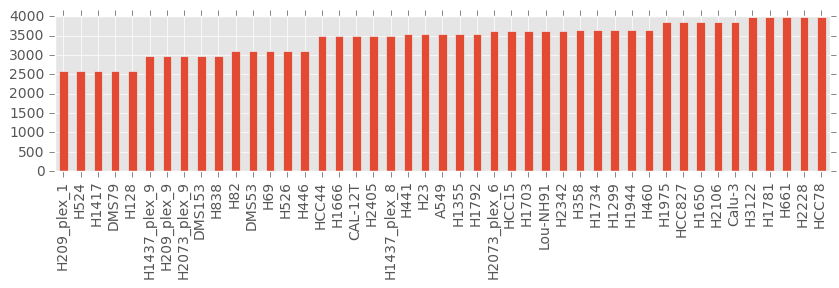

In [35]:
df_all.count().sort_values().plot(kind='bar', figsize=(10,2))

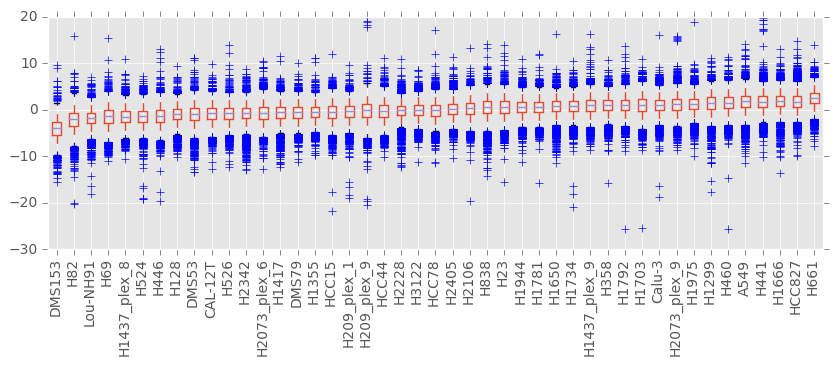

In [36]:
plot_cl_boxplot_with_missing_data(df_all)

# Zscore rows

In [37]:
df_tmp = deepcopy(df_all)
df_tmp = df_tmp.transpose()
zdf_all = (df_tmp - df_tmp.mean())/df_tmp.std()
zdf_all = zdf_all.transpose()

print(zdf_all.shape)

(8468, 45)


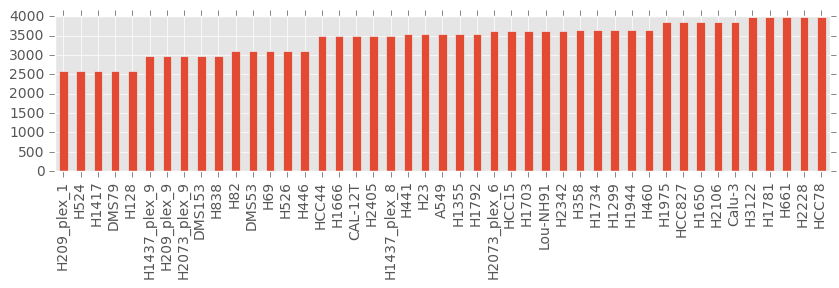

In [38]:
zdf_all.count().sort_values().plot(kind='bar', figsize=(10,2))

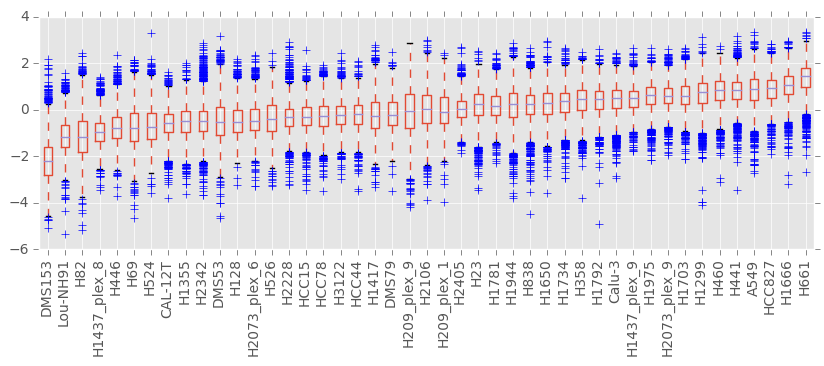

In [39]:
plot_cl_boxplot_with_missing_data(zdf_all)

There are 857 PTMs measured in all cell lines


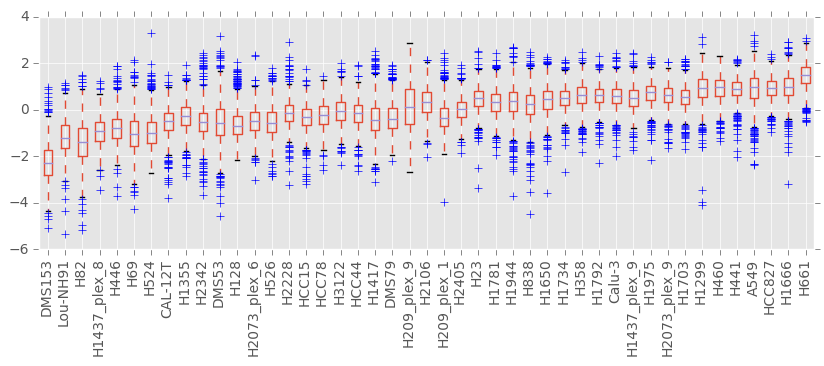

In [40]:
plot_cl_boxplot_no_missing_data(zdf_all)